In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from pyldl.algorithms import AA_BP
import pyldl.applications.facial_emotion_recognition as fer

In [3]:
import keras

In [4]:
X, y = fer.load_jaffe('./jaffe/')

In [5]:
train, test = train_test_split(np.arange(X.shape[0]), test_size=0.1, random_state=0)

In [6]:
aabp = AA_BP()

In [7]:
inputs = keras.Input(shape=X.shape[1:])
encodes = keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(256, 256, 3))(inputs)
pooling = keras.layers.GlobalAveragePooling2D()(encodes)
outputs = keras.layers.Dense(y.shape[1], activation='softmax')(pooling)

In [8]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [9]:
aabp.fit(X[train], y[train], model=model, epochs=500, X_test=X[test], y_test=y[test])

I0000 00:00:1712039798.602343   40920 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [10]:
y_pred = aabp.predict(X[test])

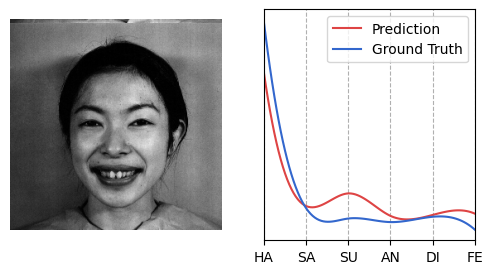

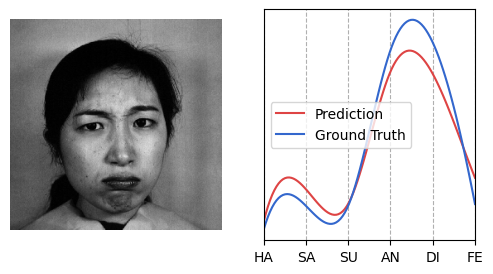

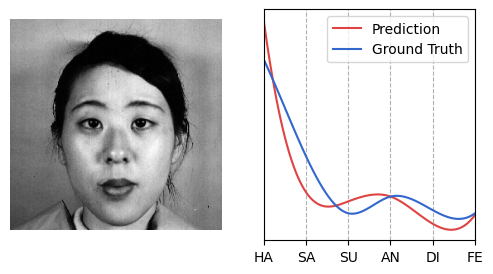

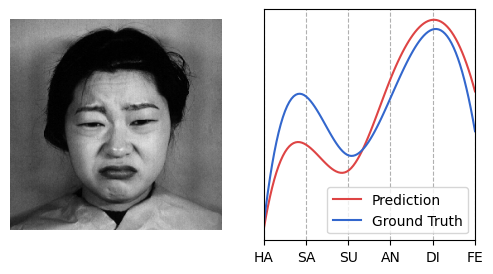

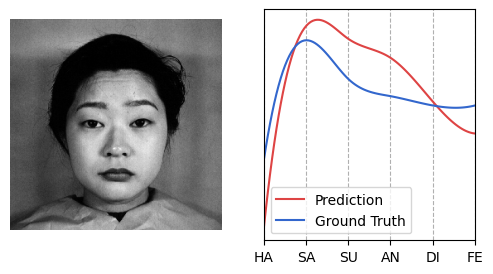

In [11]:
for i in range(5):
    fer.visualization(X[test][i], y_pred[i], y[test][i])